# MSDS 7331 Data Mining Lab 1
Profesor: Dr. Jake Drew  
Team: Steven Hayden, Josephine MacDaniel, Afreen Siddiqui, & Eduardo Cantu

In [ ]:
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt

## Business Understanding


## Data Meaning Type

## Data Quality

In [10]:


# read in the data from 2015 and 2016
Accident_df = pd.read_csv('https://raw.githubusercontent.com/ecantu75/DataMining_Lab1/master/Data/accident_2016.csv',low_memory=False)

#Accident_df = Accident_df.drop(columns='Unnamed: 0')
#Data frame description 
Accident_df.head()
#Accident_df.count()
#Accident_df.info()



,Unnamed: 0,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,0,4,Arizona,40484,1,1,0,0,0,1,...,88,0,None,0,None,0,None,1,0,2016-07-16 14:01:00+00:00
1,1,4,Arizona,40615,1,1,0,1,1,1,...,88,0,None,0,None,0,None,1,0,2016-08-28 02:33:00+00:00
2,2,4,Arizona,40610,1,1,0,0,0,3,...,99,0,None,0,None,0,None,2,0,2016-08-16 08:50:00+00:00
3,3,4,Arizona,40140,1,1,0,0,0,1,...,88,0,None,0,None,0,None,1,1,2016-02-13 00:00:00+00:00
4,4,4,Arizona,40606,1,1,0,0,0,2,...,99,0,None,0,None,0,None,1,0,2016-08-09 21:07:00+00:00


In [11]:
#check for duplicate recoreds

Accident_df['consecutive_number'].value_counts()



270332    1
120240    1
122257    1
220162    1
62868     1
130453    1
60823     1
40345     1
480672    1
220577    1
550310    1
290215    1
200107    1
210348    1
482828    1
470447    1
122289    1
470415    1
62900     1
130485    1
60855     1
40377     1
370110    1
110015    1
480704    1
220609    1
280002    1
550342    1
290247    1
200139    1
         ..
121454    1
220088    1
10864     1
80498     1
481263    1
450180    1
420472    1
490106    1
483310    1
410237    1
481918    1
371328    1
390196    1
230021    1
170630    1
122823    1
260746    1
62091     1
510604    1
121486    1
10896     1
80530     1
400022    1
420504    1
490138    1
410269    1
481950    1
230053    1
170662    1
131072    1
Name: consecutive_number, Length: 34439, dtype: int64

## Simple Statistics

37461 death in this data set. 43% of people involved in a accident die 

In [12]:
# Number of people who died in a car accident based on the given data for 2016 
percentDeath = float(sum(Accident_df.number_of_fatalities)/(sum(Accident_df.number_of_persons_not_in_motor_vehicles_in_transport_mvit)+sum(Accident_df.number_of_persons_in_motor_vehicles_in_transport_mvit)) * 100)
Deaths = sum(Accident_df.number_of_fatalities)
print('Number of people who died in a car accident in 2016: ', Deaths , percentDeath)



Number of people who died in a car accident in 2016:  37461 43.81608496303921


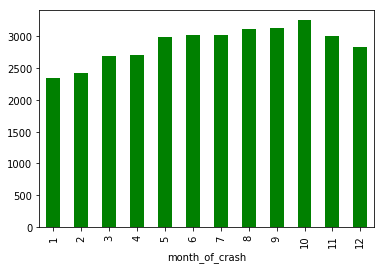

In [13]:
# Monthly data for accidents
fatility_counts = pd.crosstab([Accident_df['month_of_crash']], Accident_df.number_of_fatalities)
fatility_counts.plot(kind='bar', stacked=True, color=['green'], legend=False)

In [14]:
#top 4 month of accidents
Accident_df.groupby(['month_of_crash']).aggregate({'number_of_fatalities':sum}).sort_values('number_of_fatalities',ascending=False).head(4)

,number_of_fatalities
month_of_crash,
10,3526
8,3349
9,3344
6,3306


In [30]:
# Monthly data for accidents
acci_count=Accident_df.groupby(['month_of_crash']).count().reset_index()
acci_count.rename(columns={'Unnamed: 0': 'accident_count'}, inplace=True)
#type(acci_count)
acci_count = acci_count.filter(['month_of_crash', 'accident_count'], axis=1)
acci_count_sorted = acci_count.sort_values('accident_count',ascending=False)
acci_count_sorted.head(4)


,month_of_crash,accident_count
9,10,3249
8,9,3120
7,8,3106
6,7,3008


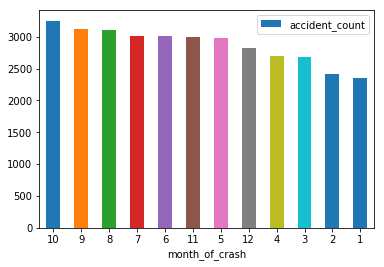

In [29]:
# Monthly data for accidents
acci_count_sorted.plot.bar(x='month_of_crash', y='accident_count', rot=0)

In [34]:
#state wise analysis for fatal accidents:
acci_count_bystate=Accident_df.groupby(['state_name']).count().reset_index()
acci_count_bystate.rename(columns={'Unnamed: 0': 'accident_count_bystate'}, inplace=True)
acci_count_bystate_sorted = acci_count_bystate.sort_values('accident_count_bystate',ascending=False)
acci_count_bystate_sorted = acci_count_bystate_sorted.filter(['state_name', 'accident_count_bystate'], axis=1)
acci_count_bystate_sorted.head(10)

,state_name,accident_count_bystate
43,Texas,3407
4,California,3357
9,Florida,2933
10,Georgia,1422
33,North Carolina,1348
38,Pennsylvania,1088
35,Ohio,1053
13,Illinois,1003
22,Michigan,980
42,Tennessee,966


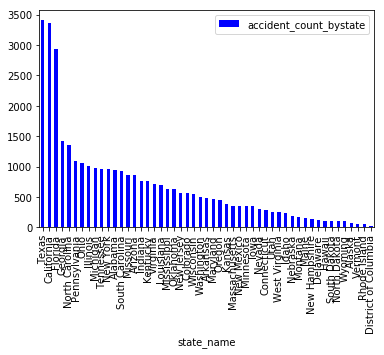

In [35]:
#state wise analysis for fatal accidents:
acci_count_bystate_sorted.plot.bar(x='state_name', y='accident_count_bystate', stacked=True, color=['blue'])

In [36]:
#Hour of accidents
acci_count_bytime=Accident_df.groupby(['hour_of_crash']).count().reset_index()
acci_count_bytime
acci_count_bytime.rename(columns={'Unnamed: 0': 'accident_count_bytime'}, inplace=True)
acci_count_bytime_sorted = acci_count_bytime.sort_values('accident_count_bytime',ascending=False)
acci_count_bytime_sorted = acci_count_bytime_sorted.filter(['hour_of_crash','accident_count_bytime'], axis=1)
acci_count_bytime_sorted.head(10)

,hour_of_crash,accident_count_bytime
18,18,1984
20,20,1919
17,17,1913
19,19,1902
16,16,1808
21,21,1801
15,15,1731
22,22,1650
14,14,1567
13,13,1514


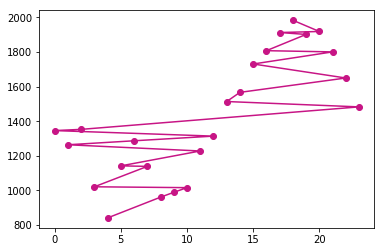

In [37]:
#Hours of accidents
acci_count_bytime_sorted = acci_count_bytime_sorted.loc[acci_count_bytime_sorted['hour_of_crash'] != 99]
plt.plot( 'hour_of_crash', 'accident_count_bytime', data=acci_count_bytime_sorted, marker='o', color='mediumvioletred')
plt.show()


In [38]:
#Location of accident 
acci_count_byloc=Accident_df.groupby(['route_signing_name']).count().reset_index()
acci_count_byloc
acci_count_byloc.rename(columns={'Unnamed: 0': 'accident_count_byloc'}, inplace=True)
acci_count_byloc_sorted = acci_count_byloc.sort_values('accident_count_byloc',ascending=False)
acci_count_byloc_sorted = acci_count_byloc_sorted.filter(['route_signing_name','accident_count_byloc'], axis=1)
acci_count_byloc_sorted.head(10)

,route_signing_name,accident_count_byloc
6,State Highway,10234
3,Local Street – Municipality,6104
7,U.S. Highway,5490
0,County Road,5160
1,Interstate,4295
4,Local Street – Township,1541
5,Other,1138
2,Local Street – Frontage Road (Since 1994),297
8,Unknown,180


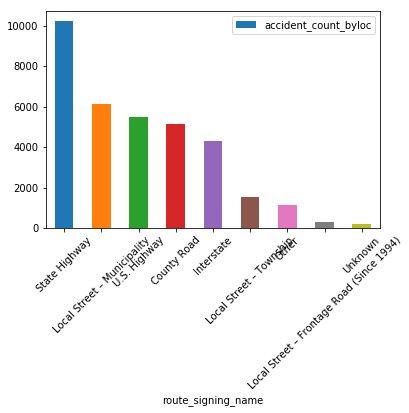

In [39]:
#Location of accident
acci_count_byloc_sorted.plot.bar(x='route_signing_name', y='accident_count_byloc', stacked=True, rot=45)

In [40]:
#Type of Collision which causes fatal accidents
acci_count_bytype=Accident_df.groupby(['manner_of_collision_name']).count().reset_index()
acci_count_bytype
acci_count_bytype.rename(columns={'Unnamed: 0': 'accident_count_bytype'}, inplace=True)
acci_count_bytype_sorted = acci_count_bytype.sort_values('accident_count_bytype',ascending=False)
acci_count_bytype_sorted = acci_count_bytype_sorted.filter(['manner_of_collision_name','accident_count_bytype'], axis=1)
acci_count_bytype_sorted.head(10)

,manner_of_collision_name,accident_count_bytype
3,Not Collision with Motor Vehicle in Transport ...,21296
0,Angle,6122
1,Front-to-Front,3511
2,Front-to-Rear,2350
9,Sideswipe – Same Direction,519
8,Sideswipe – Opposite Direction,421
5,Other (End-Swipes and Others),86
10,Unknown,77
7,Rear-to-Side,32
4,Not Reported,23


In [41]:
#level of light that existed at the time of the crash as indicated in the case material.
acci_count_bylight=Accident_df.groupby(['light_condition_name']).count().reset_index()
acci_count_bylight
acci_count_bylight.rename(columns={'Unnamed: 0': 'accident_count_bylight'}, inplace=True)
acci_count_bylight_sorted = acci_count_bylight.sort_values('accident_count_bylight',ascending=False)
acci_count_bylight_sorted = acci_count_bylight_sorted.filter(['light_condition_name','accident_count_bylight'], axis=1)
acci_count_bylight_sorted.head(10)

,light_condition_name,accident_count_bylight
4,Daylight,16336
1,Dark – Not Lighted,9494
0,Dark – Lighted,6732
5,Dusk,803
3,Dawn,595
2,Dark – Unknown Lighting,262
8,Unknown,188
6,Not Reported,15
7,Other,14


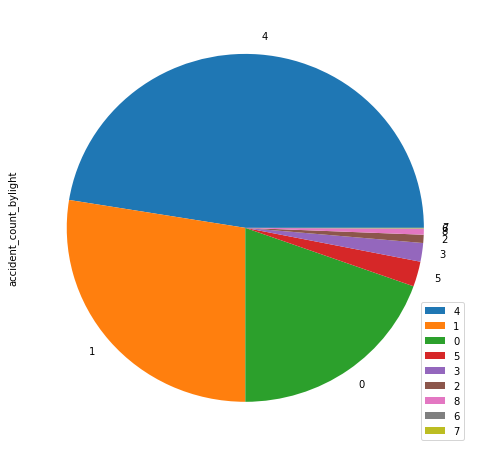

In [43]:
#level of light that existed at the time of the crash as indicated in the case material.
acci_count_bylight=Accident_df.groupby(['light_condition_name']).count().reset_index()
acci_count_bylight
acci_count_bylight.rename(columns={'Unnamed: 0': 'accident_count_bylight'}, inplace=True)
acci_count_bylight_sorted = acci_count_bylight.sort_values('accident_count_bylight',ascending=False)
acci_count_bylight_sorted.head(10)
acci_count_bylight_sorted.plot.pie(y='accident_count_bylight', figsize=(8, 8))

In [44]:
#Weather conditions during accidents
acci_count_byatm=Accident_df.groupby(['atmospheric_conditions_name']).count().reset_index()
acci_count_byatm
acci_count_byatm.rename(columns={'Unnamed: 0': 'accident_count_byatm'}, inplace=True)
acci_count_byatm_sorted = acci_count_byatm.sort_values('accident_count_byatm',ascending=False)
acci_count_byatm_sorted = acci_count_byatm_sorted.filter(['atmospheric_conditions_name','accident_count_byatm'], axis=1)
acci_count_byatm_sorted.head(10)

,atmospheric_conditions_name,accident_count_byatm
2,Clear,24620
3,Cloudy,4961
8,Rain,2148
6,Not Reported,1634
11,Snow,350
4,"Fog, Smog, Smoke",329
12,Unknown,183
10,"Sleet, Hail",66
7,Other,54
9,Severe Crosswinds,48


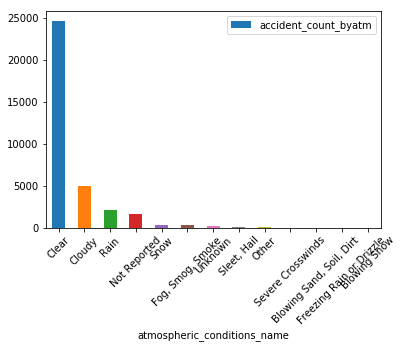

In [45]:
#Weather conditions during accidents
acci_count_byatm_sorted.plot.bar(x='atmospheric_conditions_name', y='accident_count_byatm', stacked=True, rot=45)

## Visualize Attributes

In [46]:
#simple descriptive statistics for atmospheric conditions 
Accident_df[['number_of_fatalities','atmospheric_conditions_1_name']].groupby('atmospheric_conditions_1_name').describe()

number_of_fatalities                           \
                                             count      mean       std  min   
atmospheric_conditions_1_name                                                 
Blowing Sand, Soil, Dirt                      20.0  1.150000  0.489360  1.0   
Blowing Snow                                  10.0  1.000000  0.000000  1.0   
Clear                                      24620.0  1.086596  0.345653  1.0   
Cloudy                                      5062.0  1.094034  0.371702  1.0   
Fog, Smog, Smoke                             325.0  1.092308  0.338983  1.0   
Freezing Rain or Drizzle                      16.0  1.062500  0.250000  1.0   
Not Reported                                1634.0  1.065483  0.331998  1.0   
Other                                         51.0  1.137255  0.400979  1.0   
Rain                                        2082.0  1.103746  0.417994  1.0   
Severe Crosswinds                             42.0  1.071429  0.260661  1.0   
Sleet, Hail                                   65.0  1.076923  0.268543  1.0   
Snow                                         329.0  1.082067  0.306356  1.0   
Unknown                                      183.0  1.081967  0.294366  1.0   

                                                   
                               25%  50%  75%  max  
atmospheric_conditions_1_name                      
Blowing Sand, Soil, Dirt       1.0  1.0  1.0  3.0  
Blowing Snow                   1.0  1.0  1.0  1.0  
Clear                          1.0  1.0  1.0  6.0  
Cloudy                         1.0  1.0  1.0  6.0  
Fog, Smog, Smoke               1.0  1.0  1.0  3.0  
Freezing Rain or Drizzle       1.0  1.0  1.0  2.0  
Not Reported                   1.0  1.0  1.0  6.0  
Other                          1.0  1.0  1.0  3.0  
Rain                           1.0  1.0  1.0  9.0  
Severe Crosswinds              1.0  1.0  1.0  2.0  
Sleet, Hail                    1.0  1.0  1.0  2.0  
Snow                           1.0  1.0  1.0  3.0  
Unknown                        1.0  1.0  1.0  3.0

In [47]:
#simple descriptive statistics for light condition
Accident_df[['number_of_fatalities','light_condition_name']].groupby('light_condition_name').describe()

number_of_fatalities                                \
                                       count      mean       std  min  25%   
light_condition_name                                                         
Dark – Lighted                        6732.0  1.071598  0.311110  1.0  1.0   
Dark – Not Lighted                    9494.0  1.099115  0.380961  1.0  1.0   
Dark – Unknown Lighting                262.0  1.049618  0.234520  1.0  1.0   
Dawn                                   595.0  1.089076  0.343969  1.0  1.0   
Daylight                             16336.0  1.088761  0.356263  1.0  1.0   
Dusk                                   803.0  1.089664  0.330390  1.0  1.0   
Not Reported                            15.0  1.000000  0.000000  1.0  1.0   
Other                                   14.0  1.000000  0.000000  1.0  1.0   
Unknown                                188.0  1.058511  0.257054  1.0  1.0   

                                        
                         50%  75%  max  
light_condition_name                    
Dark – Lighted           1.0  1.0  5.0  
Dark – Not Lighted       1.0  1.0  6.0  
Dark – Unknown Lighting  1.0  1.0  3.0  
Dawn                     1.0  1.0  5.0  
Daylight                 1.0  1.0  9.0  
Dusk                     1.0  1.0  5.0  
Not Reported             1.0  1.0  1.0  
Other                    1.0  1.0  1.0  
Unknown                  1.0  1.0  3.0

The correlation heat map is great for finding relationship with many attributes 

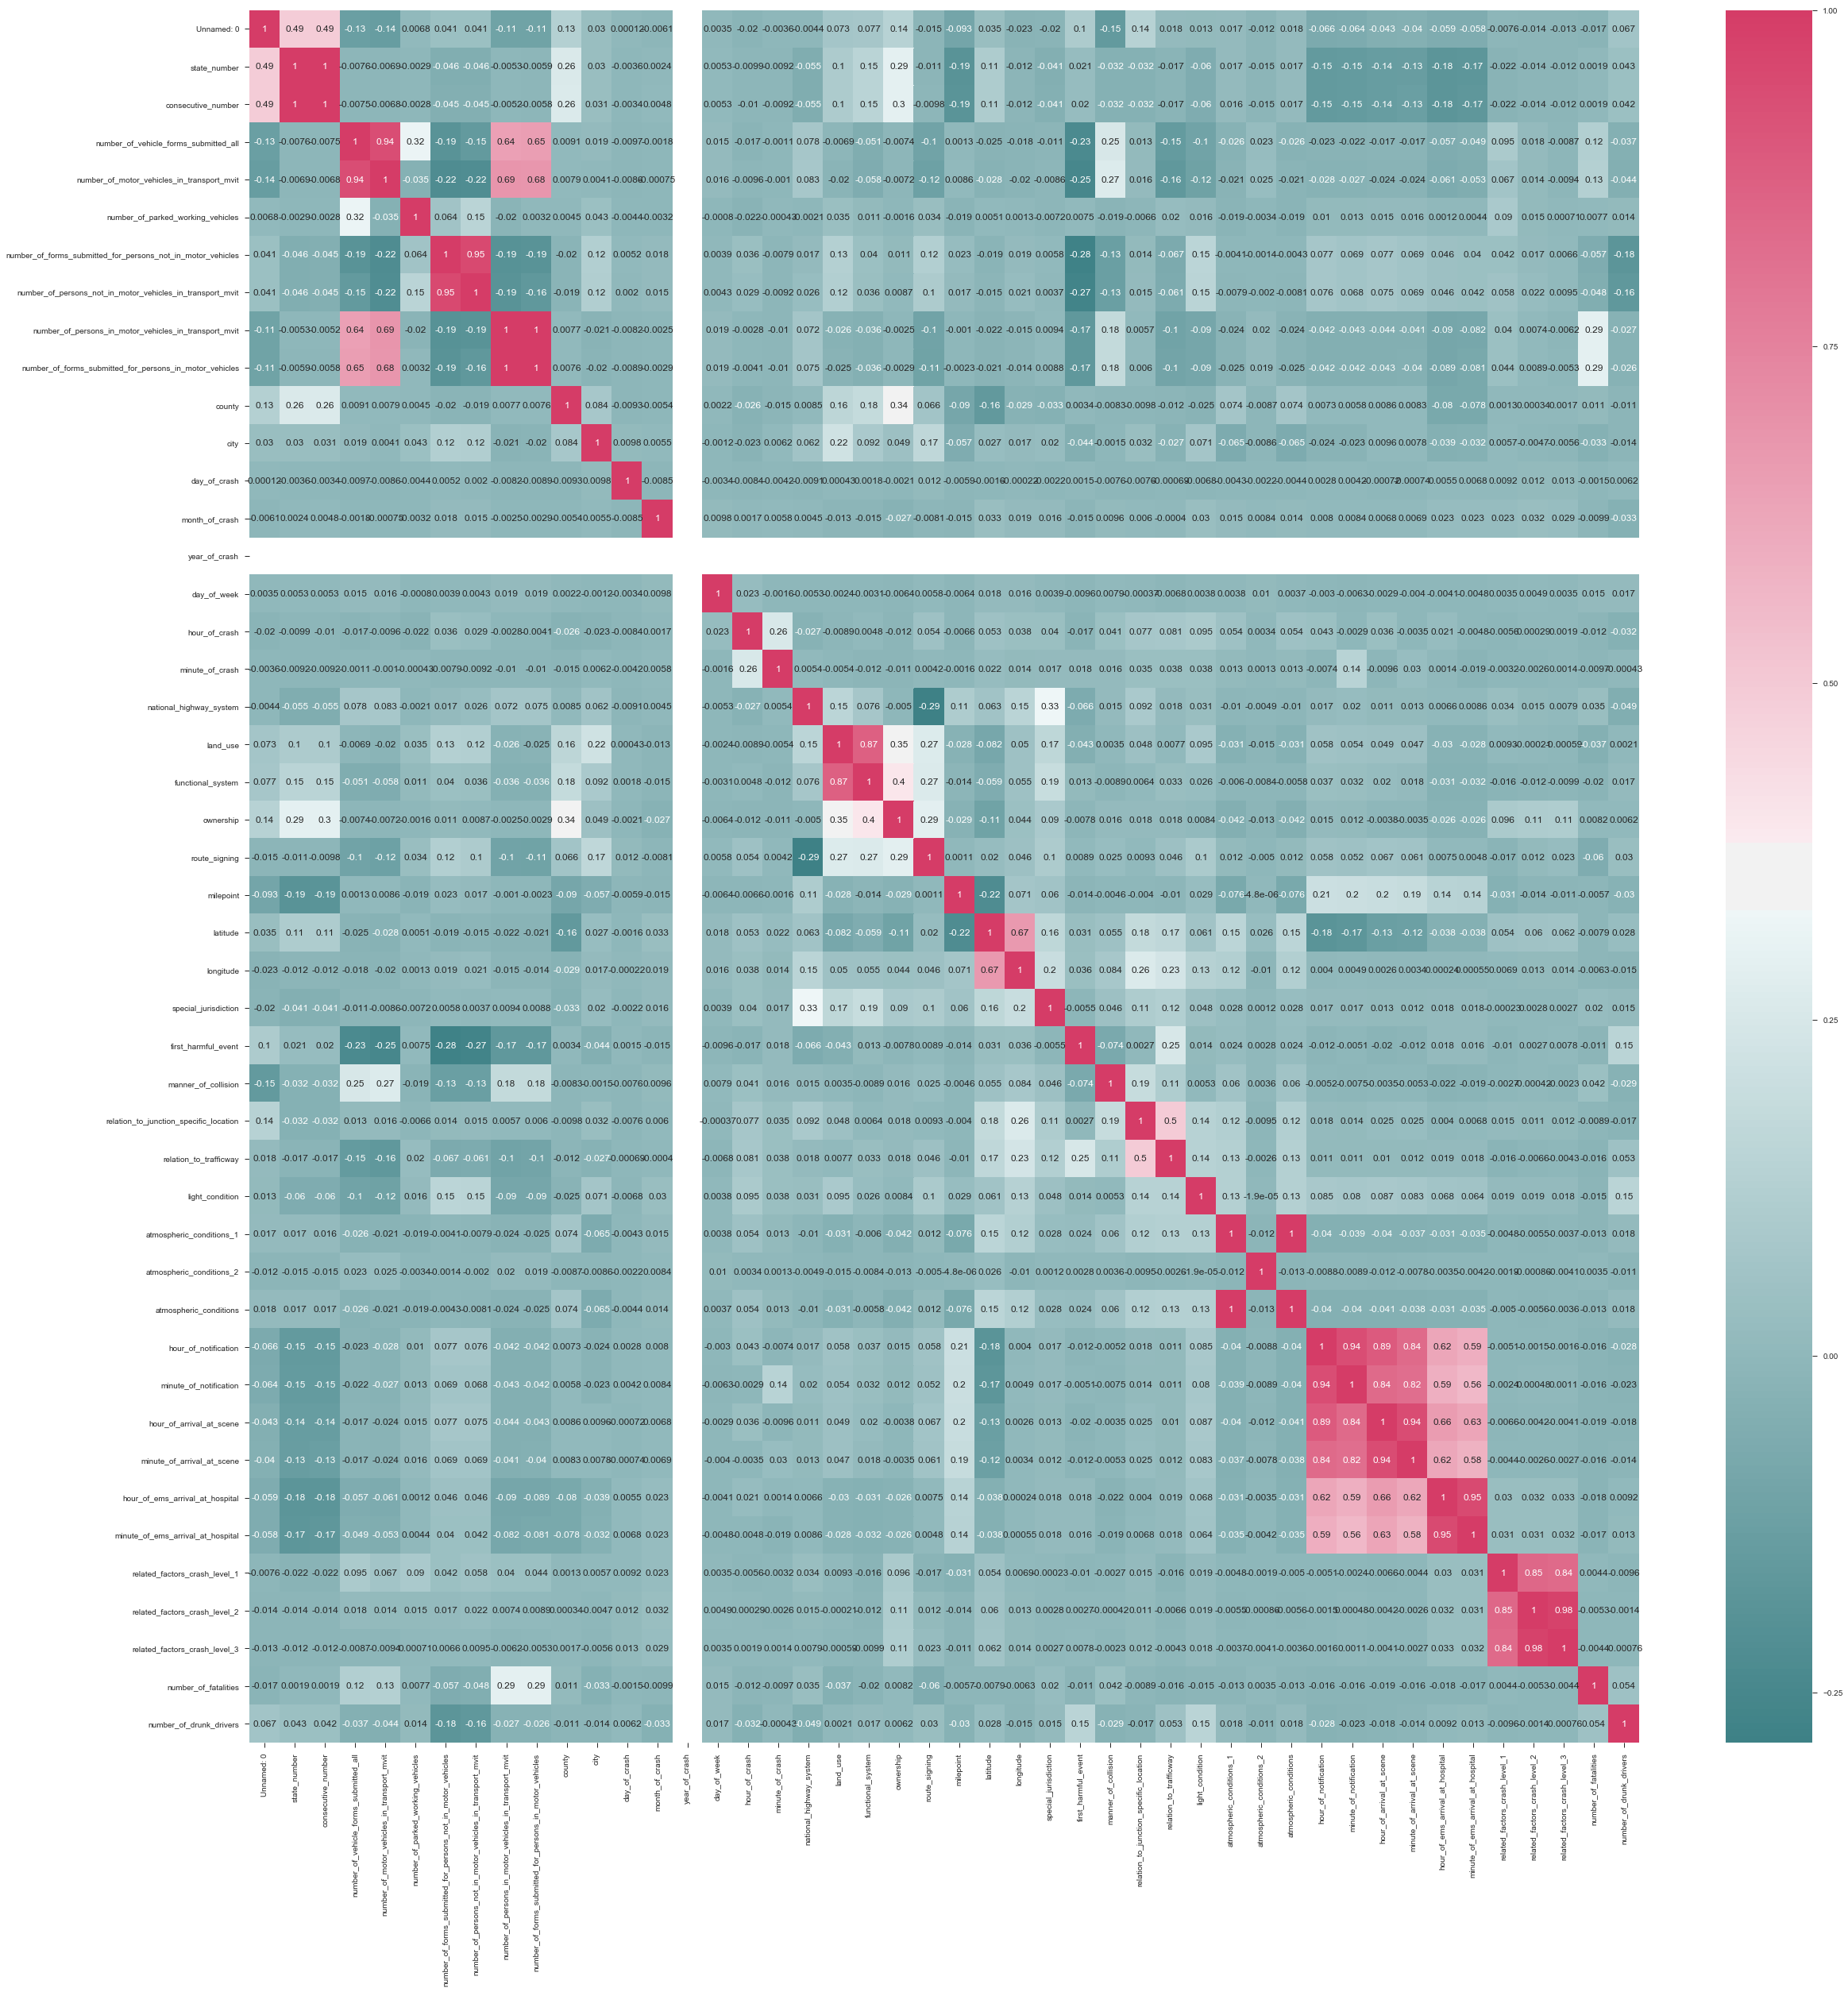

In [49]:
# plot the correlation matrix using seaborn
cmap = seaborn.diverging_palette(200, 1, as_cmap=True) # Assign color for table 
seaborn.set(style="ticks") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(35, 35))

seaborn.heatmap(Accident_df.corr(), cmap=cmap, annot=True)

f.tight_layout()

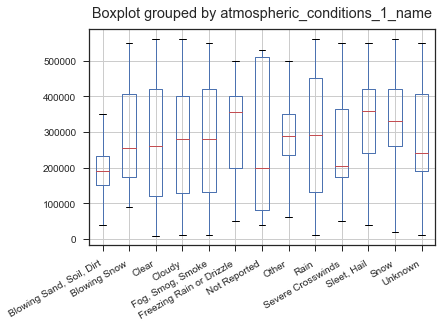

In [50]:
#Initiate boxplot 
ax = Accident_df.boxplot(column='consecutive_number', by = 'atmospheric_conditions_1_name')
# clean up titles
ax.set_xscale
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
#
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right');

ValueError: Could not interpret input 'Day_Time_Yes_No'

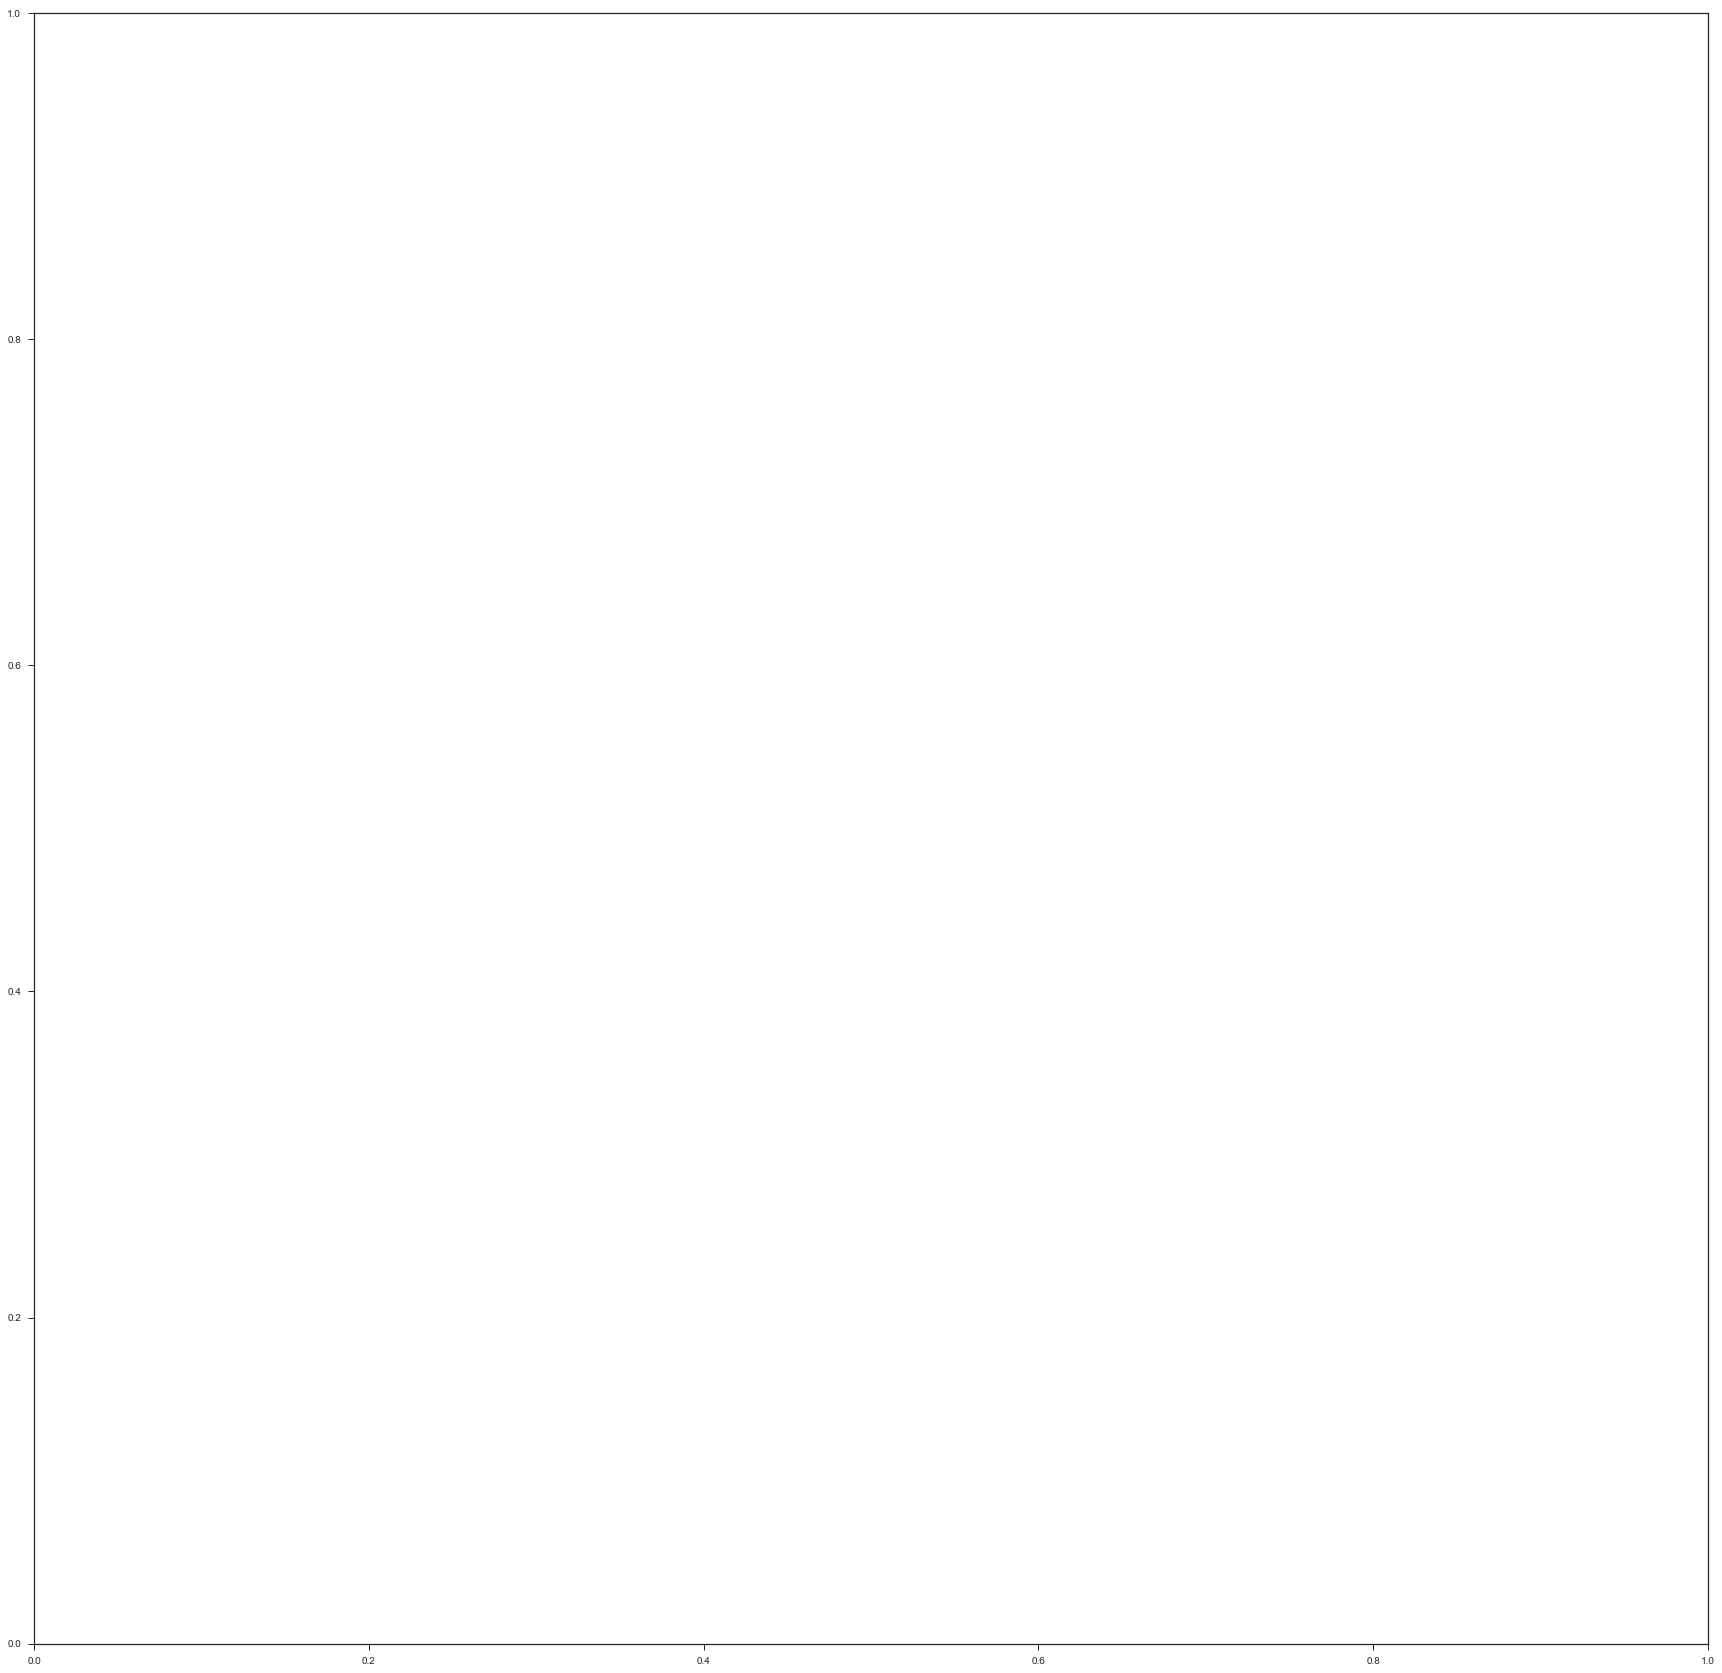

In [51]:


#adjust the size of the violin plot
f, ax = plt.subplots(figsize=(30, 30))

seaborn.violinplot(x="atmospheric_conditions_1_name", y="consecutive_number", hue="Day_Time_Yes_No", data=Accident_df, 
               split=True, inner="quart")

## Explore Joint Attributes

Relationship between the number of accidents and the weather conditions. The Attributes are:  

    * atmospheric_conditions_name
    * light_condition_name
    * number_of_fatalities  
    
    Each row or observation is car accident. It provides the conditions in which the accident occured. It captures the number of fatalities, number of people involved in the accident, the time that took the first reponders to get to the area and then to the hospital. This statistics are provided by state, highway it happend.
    One of the relations that can be made is highway vs number of accidents. Does a particular highway presents a higer risk  than than others.

In [52]:
# Load Yellowbick
from yellowbrick.features import RadViz
#from yellowbrick.features import ScatterVisualizer

ModuleNotFoundError: No module named 'yellowbrick'

In [53]:
# get the features of interest and the clasess of the target
atmosFeatures=Accident_df.atmospheric_conditions_name.unique().tolist()
atmosStates=Accident_df.state_name.unique().tolist()


X=AccPerStateAndAtmos[atmosFeatures].as_matrix()
y=AccPerStateAndAtmos.index.as_matrix()



NameError: name 'AccPerStateAndAtmos' is not defined

In [ ]:
#Group the dataset
#AccGroup_df = Accident_df.groupby(by=['state_name','atmospheric_conditions_name'])
#AccGroupFatal = AccGroup_df.number_of_fatalities.sum()
#AccGroupFatal

list(Accident_df)

In [ ]:
#Accident_df.info()
Accident_forScatter=Accident_df

# 1. Remove attributes that just arent useful for us
for col in ['Unnamed: 0',
             'state_number',
             'state_name',
             'consecutive_number',
             'county',
             'city',
             'day_of_crash',
             'month_of_crash',
             'year_of_crash',
             'day_of_week',
             'hour_of_crash',
             'minute_of_crash',
             'national_highway_system',
             'land_use',
             'land_use_name',
             'functional_system',
             'functional_system_name',
             'ownership',
             'ownership_name',
             'route_signing',
             'route_signing_name',
             'trafficway_identifier',
             'trafficway_identifier_2',
             'latitude',
             'longitude',
             'special_jurisdiction',
             'special_jurisdiction_name',
             'first_harmful_event',
             'first_harmful_event_name',
             'manner_of_collision',
             'manner_of_collision_name',
             'relation_to_junction_within_interchange_area',
             'relation_to_junction_specific_location',
             'relation_to_junction_specific_location_name',
             'type_of_intersection',
             'work_zone',
             'relation_to_trafficway',
             'relation_to_trafficway_name',
             'light_condition',
             'light_condition_name',
             'atmospheric_conditions_1',
             'atmospheric_conditions_1_name',
             'atmospheric_conditions_2',
             'atmospheric_conditions_2_name',
             'atmospheric_conditions',
             'school_bus_related',
             'rail_grade_crossing_identifier',
             'hour_of_notification',
             'minute_of_notification',
             'hour_of_arrival_at_scene',
             'minute_of_arrival_at_scene',
             'hour_of_ems_arrival_at_hospital',
             'minute_of_ems_arrival_at_hospital',
             'related_factors_crash_level_1',
             'related_factors_crash_level_1_name',
             'related_factors_crash_level_2',
             'related_factors_crash_level_2_name',
             'related_factors_crash_level_3',
             'related_factors_crash_level_3_name',
             'milepoint',
             'timestamp_of_crash',
             'number_of_vehicle_forms_submitted_all',
             'number_of_motor_vehicles_in_transport_mvit']:
                if col in Accident_forScatter:
                    del Accident_forScatter[col]
                
# Changes the varible types                
for col in list(Accident_forScatter):
    if (Accident_forScatter[col].dtype) == 'int64':
        Accident_forScatter[col]=Accident_forScatter[col].astype(float)
                
#Accident_forScatter.dtypes
#Create ScatterMatrix
x=Accident_forScatter.plot.scatter(x='Fatalities_ratio',y='number_of_parked_working_vehicles')


In [ ]:
Accident_forScatter.transpose()

In [ ]:
### Crosstab for the athmospheric conditions

AccPerStateAndAtmos=pd.crosstab(Accident_df['state_name'],Accident_df['atmospheric_conditions_1_name'])
type(AccPerStateAndAtmos)

In [ ]:
    # Group Fatalities by State and atmospheric conditions
    AccGroupby= Accident_df.groupby(by=['state_name','atmospheric_conditions_1_name'])
    AccGroupbySum=AccGroupby.number_of_fatalities.sum()
    AccGroupby.plot.scatter(x='state_name', y=AccGroupby.number_of_fatalities.sum())

## Explore Attributes and Class

## New Features

In [ ]:
#Creates a new column to identify if there was daylight at the time of the accident. Dawn and Dusk were indicated as daylight.
#This effective turns the daylight condition column into a binary field to be used later in the violin graph
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 1 , 'yes', 'no')
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 4 , 'yes', Accident_df['Day_Time_Yes_No'])
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 5 , 'yes', Accident_df['Day_Time_Yes_No'])
#Treats unknown and not reported as null in the data set. This is done because we cannot gain any insight of the lighting condition from these records. 
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 8 , np.nan , Accident_df['Day_Time_Yes_No'])
Accident_df['Day_Time_Yes_No'] = np.where(Accident_df['light_condition'] == 9 , np.nan , Accident_df['Day_Time_Yes_No'])

#count and summary of new light condition field 
Accident_df.groupby(['light_condition','light_condition_name','Day_Time_Yes_No']).size()


In [ ]:


Accident_df['Fatalities_ratio'] = Accident_df.number_of_fatalities/(Accident_df.number_of_persons_not_in_motor_vehicles_in_transport_mvit + Accident_df.number_of_persons_in_motor_vehicles_in_transport_mvit)

Accident_df.head()

## Exceptional Work